In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df = train_df.drop('Cabin', axis=1)
train_df = train_df.drop('Name', axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
mean = train_df['Age'].mean()
train_df['Age'].fillna(mean, inplace=True)
train_df.dropna(inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [9]:
test_df = test_df.drop('Cabin', axis=1)
test_df = test_df.drop('Name', axis=1)

In [10]:
mean_age = test_df['Age'].mean()
mean_fare = test_df['Fare'].mean()
test_df['Fare'].fillna(mean_fare, inplace=True)
test_df['Age'].fillna(mean_age, inplace=True)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [12]:
def preprocess(df):
    df = df.copy()
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)                     
    return df
    
train_df = preprocess(train_df)
test_df = preprocess(test_df)

train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_number,Ticket_item
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,21171,A/5
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,17599,PC
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,3101282,STON/O2.
3,4,1,1,female,35.0,1,0,113803,53.1000,S,113803,NONE
4,5,0,3,male,35.0,0,0,373450,8.0500,S,373450,NONE


In [13]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_number,Ticket_item
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,21171,A/5
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,17599,PC
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,3101282,STON/O2.
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,113803,NONE
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,373450,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S,211536,NONE
887,888,1,1,female,19.000000,0,0,112053,30.0000,S,112053,NONE
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S,6607,W./C.
889,890,1,1,male,26.000000,0,0,111369,30.0000,C,111369,NONE


In [14]:
train_df = train_df[train_df['Ticket_number'] != 'LINE']

In [15]:
train_df = train_df.copy()

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# 3. IsAlone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

# 4. Age Bins
age_bins = [0, 12, 18, 30, 60, 100]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Elderly']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)

# 5. Fare Bins
fare_bins = [0, 25, 50, 100, 1000]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# 8. Age and Pclass Interaction
train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']

# 9. Age and Sex Interaction
train_df['Age_Sex'] = train_df['Age'] * (train_df['Sex'] == 'male').astype(int)

# 10. Embarked and Pclass Interaction
train_df['Embarked_Pclass'] = train_df['Embarked'] + '_' + train_df['Pclass'].astype(str)

train_df.loc[:, 'Ticket_number'] = train_df['Ticket_number'].astype(int)
train_df.head()

/tmp/ipykernel_20/3966631404.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, 'Ticket_number'] = train_df['Ticket_number'].astype(int)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_number,Ticket_item,FamilySize,IsAlone,AgeGroup,FareGroup,Age_Pclass,Age_Sex,Embarked_Pclass
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,21171,A/5,2,0,Adult,Low,66.0,22.0,S_3
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,17599,PC,2,0,Middle-aged,High,38.0,0.0,C_1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,3101282,STON/O2.,1,1,Adult,Low,78.0,0.0,S_3
3,4,1,1,female,35.0,1,0,113803,53.1000,S,113803,NONE,2,0,Middle-aged,High,35.0,0.0,S_1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,373450,NONE,1,1,Middle-aged,Low,105.0,35.0,S_3


In [16]:
test_df = test_df.copy()

test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# 3. IsAlone
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# 4. Age Bins
age_bins = [0, 12, 18, 30, 60, 100]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Elderly']
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_labels, right=False)

# 5. Fare Bins
fare_bins = [0, 25, 50, 100, 1000]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
test_df['FareGroup'] = pd.cut(test_df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# 8. Age and Pclass Interaction
test_df['Age_Pclass'] = test_df['Age'] * test_df['Pclass']

# 9. Age and Sex Interaction
test_df['Age_Sex'] = test_df['Age'] * (test_df['Sex'] == 'male').astype(int)

# 10. Embarked and Pclass Interaction
test_df['Embarked_Pclass'] = test_df['Embarked'] + '_' + test_df['Pclass'].astype(str)

test_df['Ticket_number'] = test_df['Ticket_number'].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      418 non-null    int64   
 1   Pclass           418 non-null    int64   
 2   Sex              418 non-null    object  
 3   Age              418 non-null    float64 
 4   SibSp            418 non-null    int64   
 5   Parch            418 non-null    int64   
 6   Ticket           418 non-null    object  
 7   Fare             418 non-null    float64 
 8   Embarked         418 non-null    object  
 9   Ticket_number    418 non-null    int64   
 10  Ticket_item      418 non-null    object  
 11  FamilySize       418 non-null    int64   
 12  IsAlone          418 non-null    int64   
 13  AgeGroup         418 non-null    category
 14  FareGroup        418 non-null    category
 15  Age_Pclass       418 non-null    float64 
 16  Age_Sex          418 non-null    float64 
 1

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Ticket_number'}>,
        <Axes: title={'center': 'FamilySize'}>],
       [<Axes: title={'center': 'IsAlone'}>,
        <Axes: title={'center': 'Age_Pclass'}>,
        <Axes: title={'center': 'Age_Sex'}>]], dtype=object)

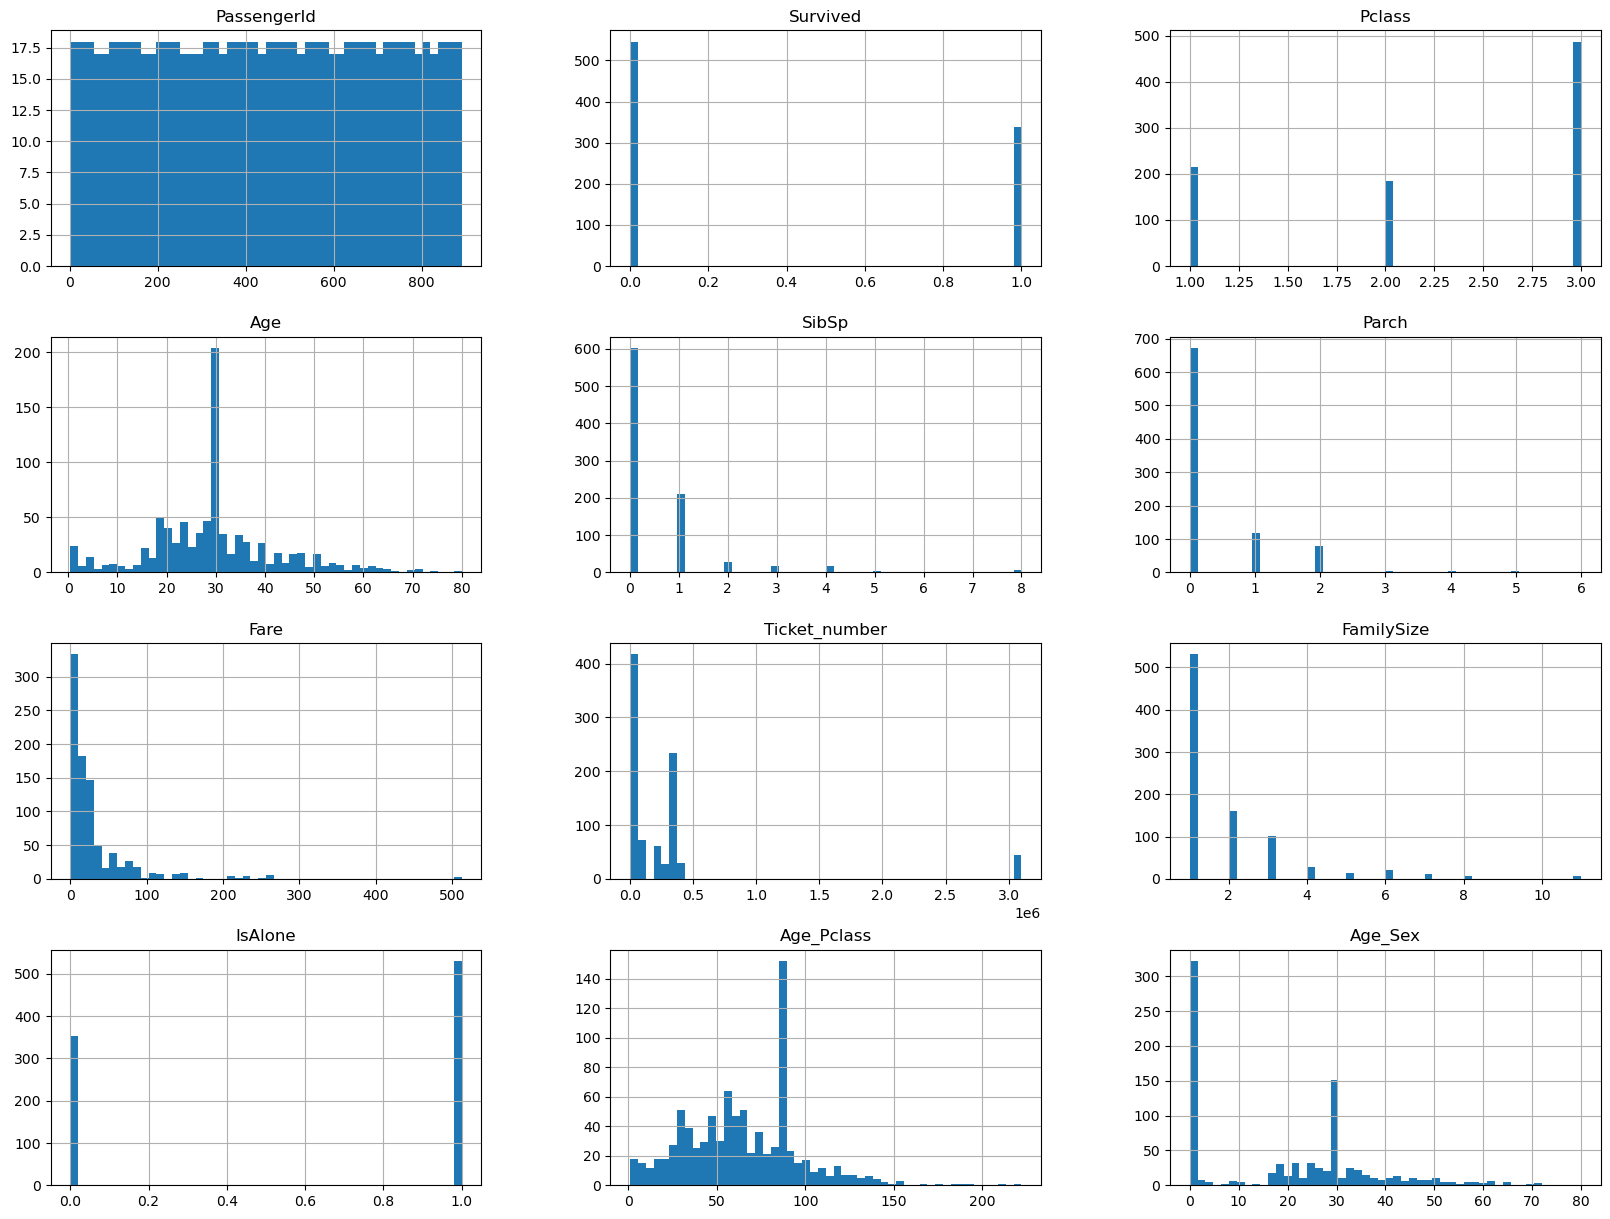

In [17]:
import matplotlib.pyplot as plt

train_df.hist(bins=50, figsize=(20, 15))

In [18]:
X_train = train_df.drop(['Survived', 'PassengerId', 'Ticket', 'Ticket_item', 'SibSp', 'Parch'], axis=1)
X_test = test_df.drop(['PassengerId', 'Ticket', 'Ticket_item', 'SibSp', 'Parch'], axis=1)
Y_train = train_df['Survived']

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           885 non-null    int64   
 1   Sex              885 non-null    object  
 2   Age              885 non-null    float64 
 3   Fare             885 non-null    float64 
 4   Embarked         885 non-null    object  
 5   Ticket_number    885 non-null    int64   
 6   FamilySize       885 non-null    int64   
 7   IsAlone          885 non-null    int64   
 8   AgeGroup         885 non-null    category
 9   FareGroup        885 non-null    category
 10  Age_Pclass       885 non-null    float64 
 11  Age_Sex          885 non-null    float64 
 12  Embarked_Pclass  885 non-null    object  
dtypes: category(2), float64(4), int64(4), object(3)
memory usage: 85.1+ KB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           418 non-null    int64   
 1   Sex              418 non-null    object  
 2   Age              418 non-null    float64 
 3   Fare             418 non-null    float64 
 4   Embarked         418 non-null    object  
 5   Ticket_number    418 non-null    int64   
 6   FamilySize       418 non-null    int64   
 7   IsAlone          418 non-null    int64   
 8   AgeGroup         418 non-null    category
 9   FareGroup        418 non-null    category
 10  Age_Pclass       418 non-null    float64 
 11  Age_Sex          418 non-null    float64 
 12  Embarked_Pclass  418 non-null    object  
dtypes: category(2), float64(4), int64(4), object(3)
memory usage: 37.3+ KB


In [20]:
num_columns = X_train.select_dtypes(include=np.number)
cat_columns = X_train.select_dtypes(include=['object', 'category'])

In [21]:
num_columns

,Pclass,Age,Fare,Ticket_number,FamilySize,IsAlone,Age_Pclass,Age_Sex
0,3,22.000000,7.2500,21171,2,0,66.000000,22.0
1,1,38.000000,71.2833,17599,2,0,38.000000,0.0
2,3,26.000000,7.9250,3101282,1,1,78.000000,0.0
3,1,35.000000,53.1000,113803,2,0,35.000000,0.0
4,3,35.000000,8.0500,373450,1,1,105.000000,35.0
...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,211536,1,1,54.000000,27.0
887,1,19.000000,30.0000,112053,1,1,19.000000,0.0
888,3,29.699118,23.4500,6607,4,0,89.097353,0.0
889,1,26.000000,30.0000,111369,1,1,26.000000,26.0


In [22]:
cat_columns

,Sex,Embarked,AgeGroup,FareGroup,Embarked_Pclass
0,male,S,Adult,Low,S_3
1,female,C,Middle-aged,High,C_1
2,female,S,Adult,Low,S_3
3,female,S,Middle-aged,High,S_1
4,male,S,Middle-aged,Low,S_3
...,...,...,...,...,...
886,male,S,Adult,Low,S_2
887,female,S,Adult,Medium,S_1
888,female,S,Adult,Low,S_3
889,male,C,Adult,Medium,C_1


In [23]:
from sklearn.preprocessing import OneHotEncoder

one_hot_train = OneHotEncoder()

cat_columns_encoded = one_hot_train.fit_transform(cat_columns)
cat_columns_encoded.toarray()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
one_hot_train.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['Adult', 'Child', 'Elderly', 'Middle-aged', 'Teenager'],
       dtype=object),
 array(['High', 'Low', 'Medium', 'Very High'], dtype=object),
 array(['C_1', 'C_2', 'C_3', 'Q_1', 'Q_2', 'Q_3', 'S_1', 'S_2', 'S_3'],
       dtype=object)]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_columns_tr = scaler.fit_transform(num_columns)

In [26]:
from sklearn.compose import ColumnTransformer

num_attribs = list(num_columns)
cat_attribs = list(cat_columns)

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, Y_train)

SGDClassifier(random_state=42)

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_prepared, Y_train, cv=3, scoring='accuracy')

array([0.77966102, 0.76949153, 0.81355932])

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
cross_val_score(random_forest, X_train_prepared, Y_train, cv=3, scoring='accuracy')

array([0.79322034, 0.81694915, 0.83050847])

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svc = SVC()
k_neighbors = KNeighborsClassifier()

# Create the VotingClassifier with the individual models
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_regression), ('rf', random_forest), 
                ('gb', gradient_boosting), ('svc', svc), ('knn', k_neighbors)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier()
]

classifiers = classifiers + [voting_classifier]

results = {}

for classifier in classifiers:
    accuracy_scores = cross_val_score(classifier, X_train_prepared, Y_train, cv=5, scoring='accuracy')
    
    results[classifier.__class__.__name__] = accuracy_scores.mean()

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
results_df.sort_values(by='Mean Accuracy', ascending=False, inplace=True)

print(results_df)

                            Mean Accuracy
GradientBoostingClassifier       0.833898
RandomForestClassifier           0.829379
VotingClassifier                 0.829379
SVC                              0.824859
LogisticRegression               0.802260
KNeighborsClassifier             0.802260


In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8], 
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  'squared_error'],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, cv=3)

grid_search.fit(X_train_prepared, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.85}


In [32]:
model = grid_search.best_estimator_

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(model, X_train_prepared, Y_train, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = perm_importance.importances_mean

# Print or visualize the importance_df to see the feature importances
print(feature_importance)

[ 0.0119774   0.00813559  0.0120904   0.02305085  0.00587571  0.00282486
  0.03028249  0.0300565   0.02011299 -0.00214689  0.01050847 -0.00011299
 -0.00180791  0.00418079  0.00090395  0.          0.00666667  0.
  0.0059887   0.00282486  0.00576271  0.00248588  0.00858757  0.
 -0.00011299  0.          0.          0.00090395  0.0020339   0.00011299
  0.02553672]


In [34]:
cross_val_score(model, X_train_prepared, Y_train, cv=3, scoring='accuracy')

array([0.77627119, 0.83728814, 0.82711864])

In [35]:
import joblib

joblib.dump(grid_search.best_estimator_, 'model.joblib')

['model.joblib']

In [36]:
model = joblib.load('model.joblib')

In [37]:
X_test = full_pipeline.fit_transform(test_df)

In [38]:
X_test

array([[ 0.87348191,  0.3349926 , -0.49840706, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87348191,  1.32553003, -0.51327429, ...,  0.        ,
         0.        ,  1.        ],
       [-0.31581919,  2.51417495, -0.46508846, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.87348191,  0.65196458, -0.50879189, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87348191,  0.        , -0.4944482 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87348191,  0.        , -0.23790598, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
X_train_prepared

array([[ 0.82834714, -0.58934747, -0.50250163, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56736273,  0.64461179,  0.78499672, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82834714, -0.28085765, -0.48892961, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82834714,  0.00442738, -0.17677309, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56736273, -0.28085765, -0.04507421, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82834714,  0.18187707, -0.49244828, ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
